1. Hadamard Block transform
     * Block Size = 512
2. Randomizing image indexes
3. 

In [1]:
from scipy.linalg import hadamard
import numpy as np
from scipy.ndimage import imread
from scipy.misc import imresize
import matplotlib.pyplot as plt

from wavelets_cdf97 import cdf97
from wavelets_cdf97 import cdf97_matlab

%matplotlib inline
%load_ext autoreload

np.random.seed(1234)

In [2]:
"""
PARAMETERS
"""
class SRM():
    def __init__():
        self.img = imread('../../data/lena512.bmp', flatten = True)
        m, n =  img.shape[0], img.shape[1]
        self.N = img.shape[0] * img.shape[1]
        self.blk_size = img.shape[0]
        self.k = int(N * 0.4)
        self.trans_mode = 'BWHT'
        self.rand_vect_type = 0  #0 - Random Permutation ; 1 - Random Flipping of the signs

        """
        TESTS
        """
        if N % blk_size != 0:
            print (' Block Size (', blk_size,') needs to be divisible by N(',N,')')
            import sys; sys.exit(1)
        
        self.measurement_matrices()
        
        self.phi    = lambda z : self.blk_f1d(z,    select_vect, rand_vect, trans_mode, blk_size)
        self.phi_T  = lambda z : self.blk_t1d(z, N, select_vect, rand_vect, trans_mode, blk_size)
        
        self.B  = self.lambda z  : A_idwt1d(phi  , z, m, n);
        self.Bt = self.lambda z : At_dwt1d(phi_T, z, m, n);
    
    def measurement_matrices(self):
        """
        Define measurement matrices
        """
        rand_vect = []
        select_vect = []
        if rand_vect_type == 0:
            rand_vect = np.random.permutation(N)
        if trans_mode == 'BWHT':
            select_vect = np.random.permutation(N)[:k]; #select the first k variables 
        
        

    def blk_f1d(self, x, select_vect, rand_vect, trans_mode, blk_size): #DFR (x)
        N = len(x)
        if trans_mode == 'BWHT':
            # Step1 : Randomizer (contribution of SRMs to Compressive Sensing)
            x[rand_vect] = x
            # Step2 : Multiplying by Transform matrix
            x_blk = np.array(x.reshape((blk_size), int(np.floor(N/blk_size))))
            Phi_B = hadamard(blk_size)/np.sqrt(blk_size)
            fx = Phi_B * x_blk
            #Step3 : Take k measurements
            b = np.array(fx.reshape((N, 1)))
            b = b[select_vect]
            return b
    
    def blk_t1d(self, b, N, select_vect, rand_vect, trans_mode, blk_size): #RFD (b)
        if trans_mode == 'BWHT':
            #Step1 : Create the original transform array
            k = len(b)
            fx = np.zeros((N,1))
            fx[select_vect] = b[:k]
            #Step2 : 
            fx = fx.reshape((blk_size, int(np.floor(N/blk_size))))
            Phi_B = hadamard(blk_size)/np.sqrt(blk_size)
            x_blk = Phi_B * fx
            x = x_blk.reshape((N,1))
            x = x[rand_vect]
            return x

    def A_idwt1d(self, A,alpha,m,n):
        # alpha : sparse vector taken from Wavelet transform of X
        # A     : random projection matrix K x N

        u = alpha.reshape((m,n))

        # im = cdf97().iwt97_2d(u)
        cdf97_obj = cdf97_matlab()
        h0,h1,f0,f1 = cdf97_obj.filter9_7(verbose = 0)
        L = 1
        im = cdf97_obj.idwt2d(u, f0, f1, L)

        x = im.reshape((N,1))
        b = A(x)  #b = phi.psi(x)
        return b

    def At_dwt1d(self, At, b, m, n):
        # b: vector K x 1

        x = At(b)
        im = x.reshape((m,n))

        # u = cdf97().fwt97_2d(im)
        cdf97_obj = cdf97_matlab()
        h0,h1,f0,f1 = cdf97_obj.filter9_7(verbose = 0)
        L = 1
        u = cdf97_obj.dwt2d(im, h0, h1, L)

        alpha = u.reshape((N,1))
        return alpha

    


In [3]:
test = 0
if test:
    img_vector = np.array(img).reshape((N,1))
    b = phi(img_vector)
    print ('b:', b.shape, ' k:', k, ' N:', N)
    x = phi_T(b)
    print ('x:', x.shape)

In [4]:
test = 1
if test:
    B = lambda z  : A_idwt1d(phi  , z, m, n);
    Bt = lambda z : At_dwt1d(phi_T, z, m, n);
    img_vector = np.array(img).reshape((N,1))
    B(img_vector)
    # B(phi_T(img.reshape((N,1))))

In [5]:
img_vector = np.array(img).reshape((N,1))
y = phi(img_vector)
tau = np.linalg.norm(y, ord = 'fro')/np.sqrt(k)/16;   

In [7]:
%autoreload 2

from TwIST import TwIST_raw                                                                
from GPSR import GPSR_raw

true_x = np.array(img).reshape((N,1))

x, x_debias, objective, times, debias_start, mses, max_svd = TwIST_raw(
                                                                y, B, tau, AT = Bt
                                                                , true_x = true_x
                                                                )

# x, x_debias, objective, times, debias_start, mses, max_svd = GPSR_raw(
#                                                                 y, B, tau, AT = Bt
#                                                                 , true_x = true_x
#                                                                 )

true_x <class 'numpy.ndarray'> [[ 162.]
 [ 162.]
 [ 162.]
 ..., 
 [ 104.]
 [ 105.]
 [ 108.]]
0. Initial Residual
y: <class 'numpy.ndarray'> (104857, 1)
A: <function <lambda> at 0x7f8b8ea022f0>
x: (262144, 1)

Initial objective = 1.898705e+06,  nonzeros=      0
Incrementing S=2.00e+00
Incrementing S=4.00e+00
Incrementing S=8.00e+00
Incrementing S=1.60e+01
Incrementing S=3.20e+01
Incrementing S=6.40e+01
Incrementing S=1.28e+02
Incrementing S=2.56e+02
Incrementing S=5.12e+02
Incrementing S=1.02e+03
Incrementing S=2.05e+03
Incrementing S=4.10e+03
Incrementing S=8.19e+03
Incrementing S=1.64e+04
Incrementing S=3.28e+04
Incrementing S=6.55e+04
Incrementing S=1.31e+05
Incrementing S=2.62e+05
Incrementing S=5.24e+05
Incrementing S=1.05e+06
Incrementing S=2.10e+06
Incrementing S=4.19e+06
Incrementing S=8.39e+06
Incrementing S=1.68e+07
Incrementing S=3.36e+07
Incrementing S=6.71e+07
Incrementing S=1.34e+08
Incrementing S=2.68e+08
Incrementing S=5.37e+08
Incrementing S=1.07e+09
Incrementing S=2.15

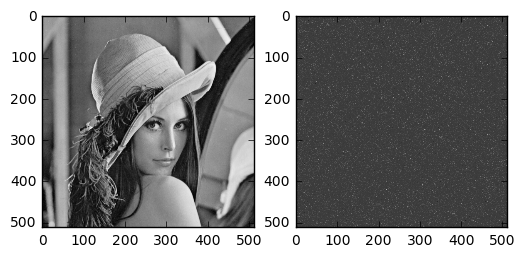

In [8]:
x_recon = x.reshape((m,n))
if len(x_debias):
    x_debias_recon = np.array(x_debias).reshape((m,n))
    f, axarr = plt.subplots(1,3)
    axarr[0].imshow(img, cmap = 'gray')
    axarr[1].imshow(x_recon, cmap = 'gray')
    axarr[2].imshow(x_debias_recon, cmap = 'gray')
else:
    f, axarr = plt.subplots(1,2)
    axarr[0].imshow(img, cmap = 'gray')
    axarr[1].imshow(x_recon, cmap = 'gray')

# x_recon_img = cdf97().fwt97_2d(x_recon)

# EXPERIMENTATION

In [ ]:
a,b = 1,2